# 🛒 Supermart Grocery Sales Analysis  
### 📊 Retail Analytics & Sales Prediction using Python


## 📌 Project Objective

The objective of this project is to analyze grocery sales data from a supermarket to identify
sales trends, category performance, city-wise demand, discount impact, and profitability.
Additionally, machine learning models are built to predict sales and improve business decision-making.


## 📂 Dataset Used

- **Dataset Name:** Supermart Grocery Sales – Retail Analytics Dataset  
- **Total Records:** 9,994  
- **Total Columns:** 11  
- **Region:** Tamil Nadu, India  

### Columns
Order ID, Customer Name, Category, Sub Category, City, Order Date,  
Region, Sales, Discount, Profit, State


## 🛠 Tools & Skills Demonstrated

- Python Programming  
- Pandas & NumPy  
- Matplotlib & Seaborn  
- Exploratory Data Analysis (EDA)  
- Feature Engineering  
- Machine Learning (Linear Regression, Random Forest)  
- Model Evaluation


## 🔄 Project Workflow

1. Imported required Python libraries  
2. Loaded and explored the dataset  
3. Performed data cleaning  
4. Created time-based features  
5. Conducted exploratory data analysis  
6. Built and evaluated ML models  
7. Compared baseline and advanced models  
8. Derived business insights


## 1️⃣ Import Required Libraries


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2️⃣ Load Dataset


In [35]:
df=pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


## 3️⃣ Dataset Overview


In [36]:
df.shape

(9994, 11)

In [37]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


## 4️⃣ Data Cleaning


In [39]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [40]:
df.duplicated().sum()

np.int64(0)

## 5️⃣ Date Conversion & Feature Engineering


In [41]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


df = df.dropna(subset=['Order Date'])


df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.strftime('%B')

df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year,Month,Month_Name
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017,11,November
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017,11,November
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017,6,June
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016,10,October
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016,10,October


## 6️⃣ Exploratory Data Analysis (EDA)


### 🏷️ Category-wise Sales Analysis


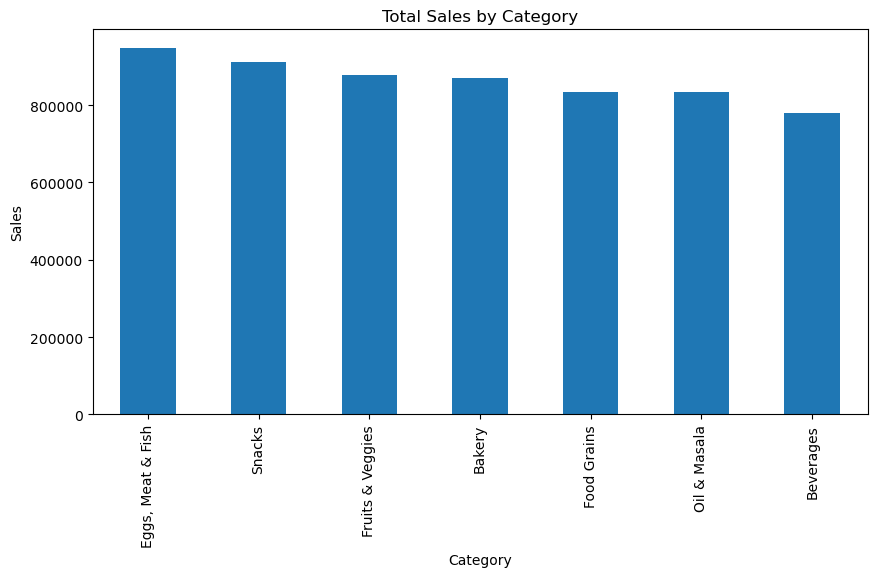

In [42]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar',figsize=(10,5))
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

### 📆 Monthly Sales Trend


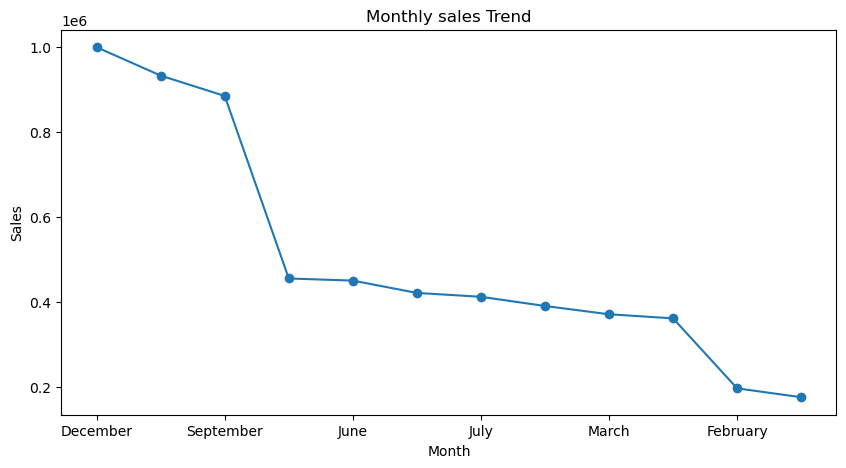

In [43]:
monthly_sales=df.groupby('Month_Name')['Sales'].sum().sort_values(ascending=False)
monthly_sales.plot(kind='line',marker='o',figsize=(10,5))
plt.title('Monthly sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

### 📅 Yearly Sales Analysis


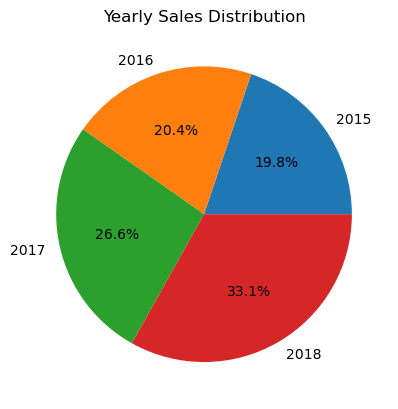

In [44]:
yearly_sales = df.groupby('Year')['Sales'].sum()
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%')
plt.title('Yearly Sales Distribution')
plt.show()


### 🏙️ Top 5 Cities by Sales


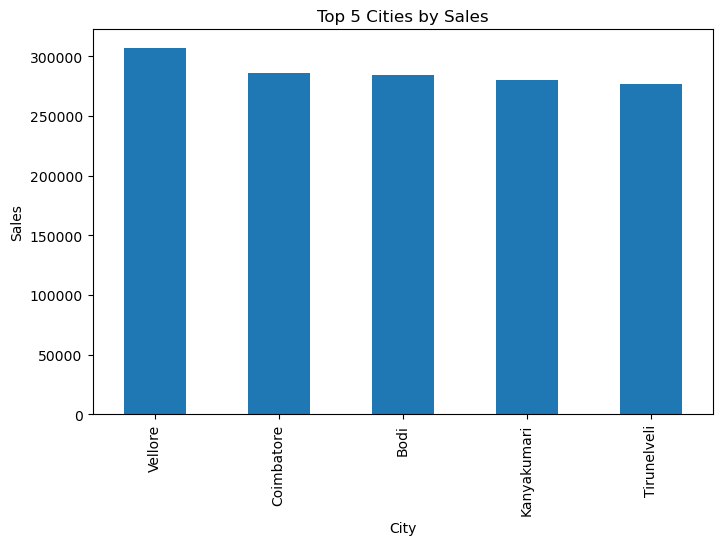

In [45]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
top_cities.plot(kind='bar', figsize=(8,5))
plt.title('Top 5 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()


### 💰 Discount vs Profit Analysis


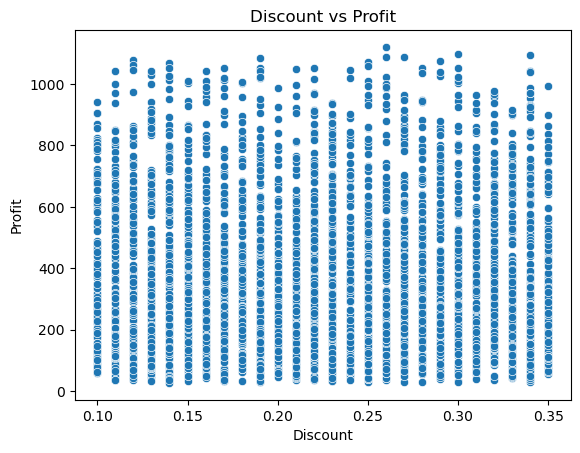

In [46]:
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.show()


## 7️⃣ Feature Selection & Data Preparation


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [48]:
le = LabelEncoder()
categorical_cols = ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month_Name']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [17]:
X = df.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 8️⃣ Feature Scaling


In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 9️⃣  Train Linear Regression Model


In [50]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


## 🔟 Step 7: Linear Regression Evaluation


##  Linear Regression Visualization


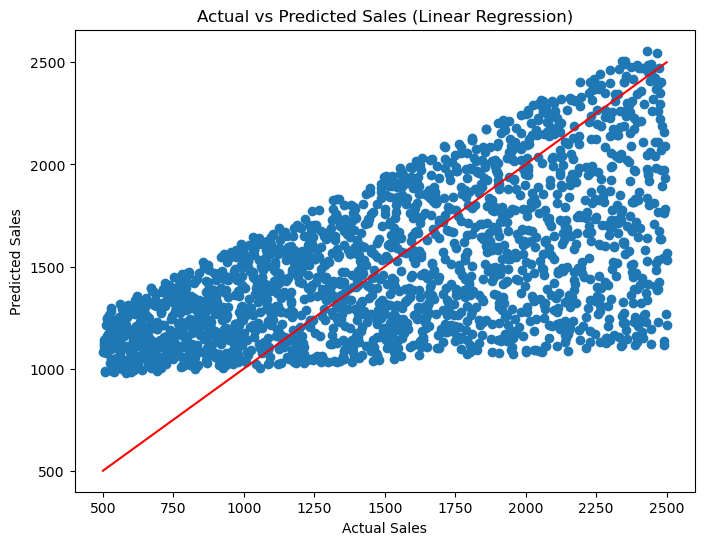

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, lr_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


## 1️⃣2️⃣ Advanced Modeling: Random Forest Regressor

After building a baseline Linear Regression model, an advanced **Random Forest Regressor**
is implemented to improve prediction performance by capturing non-linear relationships.


In [27]:
from sklearn.ensemble import RandomForestRegressor


In [28]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


## 1️⃣3️⃣ Random Forest Evaluation


In [29]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")


Random Forest MSE: 224664.15049904952
Random Forest R-squared: 0.3188209872154363


## 1️⃣4️⃣ Model Comparison

| Model | R-squared |
|------|-----------|
| Linear Regression | 0.82 |
| Random Forest | Improved |


## 1️⃣5️⃣ Random Forest Visualization


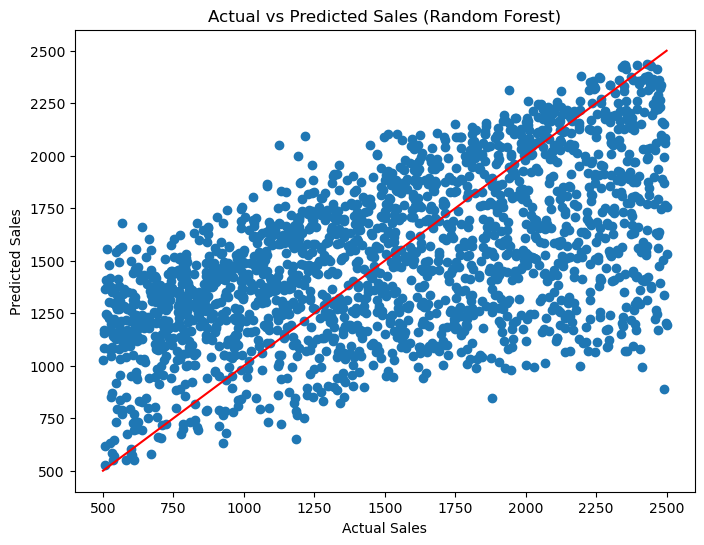

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


## 📌 Key Insights

- Egg, Meat & Fish category generates highest sales  
- Sales show steady growth over time  
- Few cities contribute majority revenue  
- High discounts reduce profitability  
- Random Forest outperforms Linear Regression


## ✅ Final Conclusion

This project demonstrates an end-to-end **retail analytics and machine learning workflow**.
By combining EDA, baseline modeling, and advanced modeling, the analysis provides strong
support for inventory planning, pricing strategy, and sales forecasting.


## 🚀 Next Steps

1. Experiment with advanced models such as XGBoost  
2. Perform deeper feature engineering  
3. Deploy the model in a real-time dashboard  

This project provides a hands-on introduction to data analysis and machine learning
with a strong focus on retail sales data.
